# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Kevin Martínez Gallego
#### Segundo Integrante: Andrés Mauricio Álvarez Ortiz

In [2]:
from __future__ import division
import numpy as np
from numpy import round
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1: Limipiar base de datos y completar código

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

### Limipiar base de datos
La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

1. **Cargar** la base de datos
2. **Quitar** todos registros de la base de datos que son perdidos y están marcados como -200, es decir, donde haya un valor -200 eliminaremos el registro.
3.  Ya hemos eliminado los registros con valor de la variable de salida perdido. Ahora vamos a **imputar los valores perdidos** en cada una de las características.
4. **Verificar** si quedaron valores faltante

In [3]:
#Paso 1: Cargar
db = np.loadtxt('BDatos/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)

DataBase = db

#Paso 2: Quitar
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida.")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))


##Paso 3: Imputar
print ("\nProcesando imputación de valores perdidos en las características . . .\n")


for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w])) ## Se imputa con la media de toda la caracteristicas
        
print ("Imputación finalizada.\n")


##Paso 4: Verificar

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida.

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


Base de datos final

In [4]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

In [5]:
print(X.shape)
print(Y.shape)

(8991, 12)
(8991,)


Definimos la función Mean Absolute Percentage Error para los problemas de regresión

In [9]:
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 



### Complete el código

A continuación complete el siguiente código para crear el modelo vectores de soporte(SVM) para regresión usando la librería sklearn. 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [10]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time

def execute_SVR(kernel, regParam, gamma):
    tiempo_i = time.time()

    #Implemetamos la metodología de validación cross validation con 5 folds
    Folds = 5
    Errores = np.ones(Folds)
    porcentajeVectores = np.zeros(Folds)
    j = 0
    kf = KFold(n_splits=Folds)

    for train_index, test_index in kf.split(X):

        Xtrain, Xtest = X[train_index], X[test_index]
        Ytrain, Ytest = Y[train_index], Y[test_index]  

        #Complete el código
                
        #Normalizamos los datos
        scaler = preprocessing.StandardScaler().fit(Xtrain)
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        # Entrenar el modelo
        if(kernel == 'rbf'):
            model = SVR(C=regParam, kernel='rbf', gamma=gamma).fit(Xtrain, Ytrain)
        else:
            model = SVR(C=regParam, kernel=kernel).fit(Xtrain, Ytrain)

        porcentajeVectores[j] = np.sum(len(model.support_))/np.shape(Xtrain)[0]
            
        # Validación del modelo
        Y_pred = model.predict(Xtest)

        Errores[j] = MAPE(Y_pred, Ytest)
        j+=1

    error = round(np.mean(Errores),3)
    std_error = round(np.std(Errores),3)
    vectores_soporte = round(np.mean(porcentajeVectores),3)
    
    print("\nError de validación: " + str(error) + " +/- " + str(std_error) + ", % vectores de soporte: " + str(vectores_soporte))

    print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
    
    return(str(error), str(std_error), str(vectores_soporte), Ytest, Y_pred)

In [8]:
execute_SVR('rbf', 100, 1)


Error de validación: 0.226 +/- 0.111, % vectores de soporte: 0.219


Tiempo total de ejecución: 47.7696008682251 segundos.


('0.226', '0.111', '0.219')

## Ejercicio 2: Experimentos

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [10]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
#df_types["MAPE Promedio"][23] = "0.2259"
#df_types["Intervalo de confianza"][23] = "0.1109"
#df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)

index = 0
kernel = 'linear'
regParam = [0.001, 0.01, 0.1, 1, 10, 100]
gammaValues = [0.01, 0.1, 1]

for i in range(np.size(regParam)):
    eff, std_eff, sv = execute_SVR(kernel, regParam[i], -1)
    df_types["MAPE Promedio"][index] = eff
    df_types["Intervalo de confianza"][index] = std_eff
    df_types["% de Vectores de Soporte"][index] = sv
    index += 1

kernel = 'rbf'
for i in range(np.size(regParam)):
    C = regParam[i]
    for j in range(np.size(gammaValues)):
        eff, std_eff, sv = execute_SVR(kernel, C, gammaValues[j])
        df_types["MAPE Promedio"][index] = eff
        df_types["Intervalo de confianza"][index] = std_eff
        df_types["% de Vectores de Soporte"][index] = sv
        index += 1

qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget


Error de validación: 0.215 +/- 0.065, % vectores de soporte: 0.379


Tiempo total de ejecución: 16.34675669670105 segundos.

Error de validación: 0.245 +/- 0.096, % vectores de soporte: 0.377


Tiempo total de ejecución: 12.361960887908936 segundos.

Error de validación: 0.277 +/- 0.135, % vectores de soporte: 0.385


Tiempo total de ejecución: 27.428181886672974 segundos.

Error de validación: 0.287 +/- 0.151, % vectores de soporte: 0.386


Tiempo total de ejecución: 132.8582968711853 segundos.

Error de validación: 0.287 +/- 0.15, % vectores de soporte: 0.386


Tiempo total de ejecución: 575.6068267822266 segundos.

Error de validación: 0.289 +/- 0.153, % vectores de soporte: 0.386


Tiempo total de ejecución: 2931.2996480464935 segundos.

Error de validación: 0.401 +/- 0.206, % vectores de soporte: 0.747


Tiempo total de ejecución: 10.906141996383667 segundos.

Error de validación: 0.329 +/- 0.14, % vectores de soporte: 0.643


Tiempo total de ejecución: 9.030409812927246 segundos

/opt/anaconda3/lib/python3.7/site-packages/qgrid/grid.py:827: DeprecationWarning: QgridWidget._df_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _df_changed(self):


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [11]:
qgrid_widget.get_changed_df()

MAPE Promedio Intervalo de confianza  \
Kernel C       gamma                                        
lineal 0.001   0.00          0.215                  0.065   
       0.010   0.00          0.245                  0.096   
       0.100   0.00          0.277                  0.135   
       1.000   0.00          0.287                  0.151   
       10.000  0.00          0.287                   0.15   
       100.000 0.00          0.289                  0.153   
rbf    0.001   0.01          0.401                  0.206   
               0.10          0.329                   0.14   
               1.00          0.491                  0.286   
       0.010   0.01          0.183                  0.038   
               0.10          0.179                  0.051   
               1.00          0.391                  0.234   
       0.100   0.01          0.147                  0.038   
               0.10           0.15                  0.054   
               1.00          0.269                   0.15   
       1.000   0.01          0.204                  0.187   
               0.10          0.192                   0.14   
               1.00          0.238                   0.13   
       10.000  0.01          0.559                  0.912   
               0.10           0.18                  0.171   
               1.00          0.223                  0.108   
       100.000 0.01           0.69                   1.21   
               0.10          0.214                  0.204   
               1.00          0.226                  0.111   

                     % de Vectores de Soporte  
Kernel C       gamma                           
lineal 0.001   0.00                     0.379  
       0.010   0.00                     0.377  
       0.100   0.00                     0.385  
       1.000   0.00                     0.386  
       10.000  0.00                     0.386  
       100.000 0.00                     0.386  
rbf    0.001   0.01                     0.747  
               0.10                     0.643  
               1.00                     0.769  
       0.010   0.01                     0.443  
               0.10                     0.278  
               1.00                     0.562  
       0.100   0.01                      0.19  
               0.10                     0.152  
               1.00                     0.269  
       1.000   0.01                     0.122  
               0.10                     0.166  
               1.00                     0.217  
       10.000  0.01                     0.164  
               0.10                     0.104  
               1.00                     0.213  
       100.000 0.01                     0.102  
               0.10                     0.105  
               1.00                     0.219

## Ejercicio 3: Completar preguntas

3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

R/: La idea de la función Kernel es mapear las muestras, que originalmente estan en un espacio d-dimensional, a un espacio de mayor dimensión en el cual aumenta la capacidad del modelo de realizar predicciones. Para un problema de clasificación, la función Kernel puede hacer posible que clases traslapadas en el espacio orginal sean linealmente separables en el nuevo espacio. Para un problema de regresión, la función Kernel puede permitir encontrar una curva más representativa de las muestras de entrenamiento.

3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.

R/: Si. Porque en regresión, los vectores de soporte son las muestras que están fuera del epsilon-tubo o justo en el limite; es decir, las muestras que son "difíciles" de ajustar a la curva. En clasificación, los vectores de soporte son las muestras que están dentro del margen o justo en el límite; es decir, las muestras que son "difíciles" de clasificar.


3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

Complete el código para hacer la gráfica aquí

Configuración con menor error: Kernel RBF, C=0.1, gamma=0.01

In [11]:
(mape, std_mape, sv, Ytest, Ypred) = execute_SVR('rbf', 0.1, 0.01)


Error de validación: 0.147 +/- 0.038, % vectores de soporte: 0.19


Tiempo total de ejecución: 3.519688606262207 segundos.


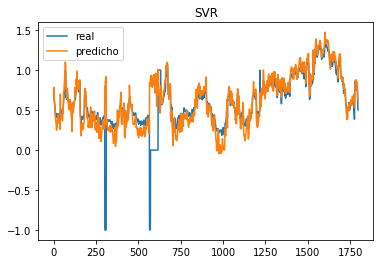

In [12]:
plt.plot(Ytest)
plt.plot(Ypred)
plt.title('SVR')
plt.legend(['real', 'predicho'])
plt.show()